In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

filer = sorted(os.listdir('datafiler2'))
number = np.arange(0,11)

L = 100 #mm

b = np.array([ 19.6, 19.6, 19.6, 19.6, 19.6, 19.6, 19.6, 7.6, 8.0, 7.8, 7.88])
h = np.array([  2.1,  2.1,  2.1,  2.1,  2.1,  4.2,  6.3, 2.2, 2.2, 2.2,  4.4])
I = (b*h**3)/12
z_max = h/2
Z = I/z_max

samples = []
for f in filer:
    data = np.genfromtxt('datafiler2/'+f)
    tmpdict = {}
    tmpdict["force"] = data[:,1]
    tmpdict["uncorrdisp"] = data[:,0]
    tmpdict["disp"] = tmpdict["uncorrdisp"] -0.00075*tmpdict["force"] #korrigering for forskyvingen i maskinen
    samples.append(tmpdict)
print(z_max)

[1.05 1.05 1.05 1.05 1.05 2.1  3.15 1.1  1.1  1.1  2.2 ]


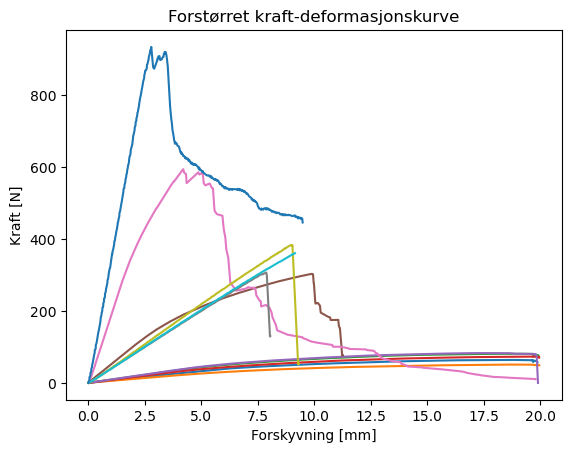

In [3]:
for sample in samples:
    plt.plot(sample["disp"], sample["force"])
#plt.xlim(0,5)
#plt.ylim(0,500)
plt.title("Forstørret kraft-deformasjonskurve")
plt.xlabel("Forskyvning [mm]")
plt.ylabel("Kraft [N]")
plt.savefig("forstørret.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [4]:
displacmentStart = 0.25
displacmentEnd = 1.25
E = []

for i in number:
    sample = samples[i]
    indexStart = np.where(sample["disp"]> displacmentStart)[0][0]
    indexStop = np.where(sample["disp"]> displacmentEnd)[0][0]
    forceStart = sample["force"][indexStart]
    forceStop = sample["force"][indexStop]
    slope = (forceStop - forceStart)/(displacmentEnd - displacmentStart)
    E.append(slope*L**3/(48*I[i]*1e3))

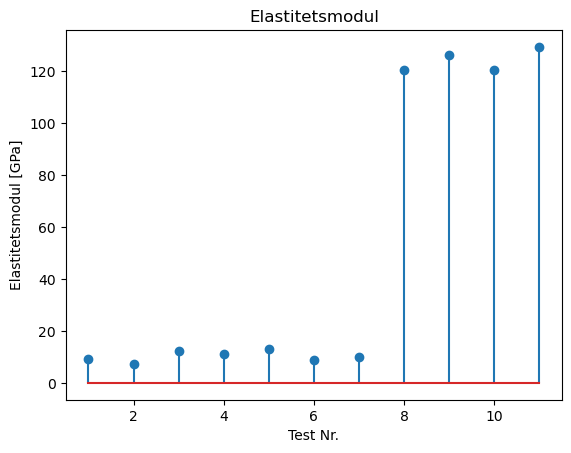

10.170971968057176
123.91050232016136


In [5]:
plt.stem(number +1, E)
#plt.ylim(180,205)
plt.title("Elastitetsmodul")
plt.ylabel("Elastitetsmodul [GPa]")
plt.xlabel("Test Nr.")
plt.savefig("emod.pdf", format="pdf", bbox_inches="tight")
plt.show()
print(np.mean(E[0:7])) 
print(np.mean(E[7:11]) )

In [6]:
print(E)

[9.321512861704445, 7.213429589522883, 12.19192730542168, 10.991479520217542, 12.857848030692676, 8.669365057328402, 9.951241411512594, 120.21963600775038, 126.10378709616825, 120.13421323855206, 129.18437293817476]
